In [36]:
import os

os.environ["SEED"] = "1"
os.environ["TEST_DIR"] = "TEST_600"
os.environ["TRAIN_DIR"] = "TRAIN_200"
import numpy as np
import pandas as pd
from ConfigSpace import Configuration

from src.aac.AAC import AAC
from src.configuration_space.LKH import CONFIGURATION_SPACE
from src.constant import DATA_DIR, SEED, DATABASE_DIR, MAIN_DIR, TEST_DIR, TRAIN_DIR
from src.database import DB
from src.database.queries import *
from src.instance.Instance import Instance
from src.instance.InstanceList import InstanceList
from src.instance.TSP_Instance import TSP_Instance, TSP_train_test_from_index_file, TSP_from_index_file
from src.solver.Portfolio import Portfolio
from src.solver.TSP_LKH_Solver import TSP_LKH_Solver
from src.aac.SurrogateEstimator import Estimator1, SurrogateEstimator

In [12]:
250 * 500

125000

In [37]:
test_instances = TSP_from_index_file(filepath=DATA_DIR / "TSP" / "TEST_400" / "index.json", max_cost=100.0, max_time=10.0)
instance = test_instances[23]
instance

TSP_Instance(filepath=TSP/TEST_400/grid/003.tsp)

In [38]:
solver = TSP_LKH_Solver()
solver

Solver(id=2120600555654569481)

In [39]:
solver.solve(instance, prefix="test")

[2025-03-10 22:27:59] DEBUG     solve(prefix=test, solver=Solver(id=2120600555654569481), instance=TSP_Instance(filepath=TSP/TEST_400/grid/003.tsp))
[2025-03-10 22:28:09] DEBUG     Solver.Result(prefix=test, solver=Solver(id=2120600555654569481), instance=TSP_Instance(filepath=TSP/TEST_400/grid/003.tsp), cost=100.00, time=10.00, cached=False, surrogate=False, error=False)


<Future at 0x10818c01d50 state=finished returned Result>

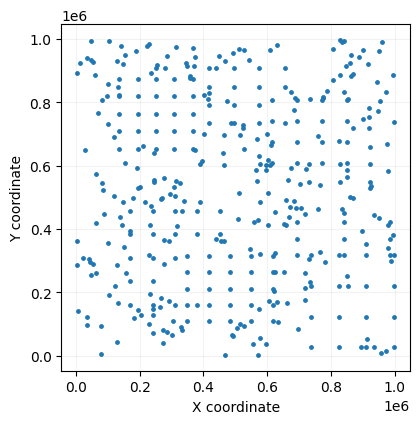

In [105]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4.5, 4.5))

df = instance._read_file_to_df()
plt.scatter(df["X"], df["Y"], s=6)
ax.ticklabel_format(style="scientific", axis="both", scilimits=(0, 0))
plt.grid(color="black", alpha=0.05)

plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.savefig("grid.pdf", bbox_inches="tight", transparent=True)
plt.show()

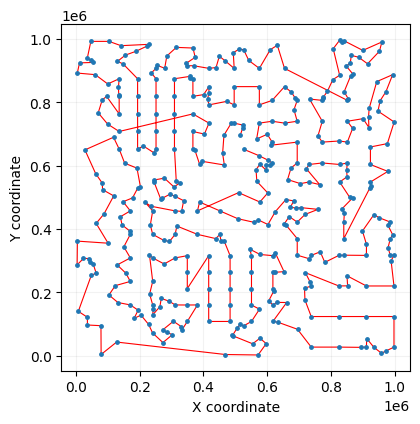

In [104]:
idx = []
with open("out") as f:
    for line in f:
        if line.startswith("NAME"):
            continue
        elif line.startswith("COMMENT"):
            continue
        elif line.startswith("TYPE"):
            continue
        elif line.startswith("DIMENSION"):
            continue
        elif line.startswith("TOUR"):
            continue
        elif line.startswith("-1"):
            break
        idx.append(int(line.strip()))

fig, ax = plt.subplots(figsize=(4.5, 4.5))
df = instance._read_file_to_df()
plt.plot(df.loc[idx, "X"], df.loc[idx, "Y"], c="red", lw=0.8, zorder=1)
plt.scatter(df["X"], df["Y"], s=6, zorder=2)
ax.ticklabel_format(style="scientific", axis="both", scilimits=(0, 0))
plt.grid(color="black", alpha=0.05)
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.savefig("grid_solved.pdf", bbox_inches="tight", transparent=True)
plt.show()

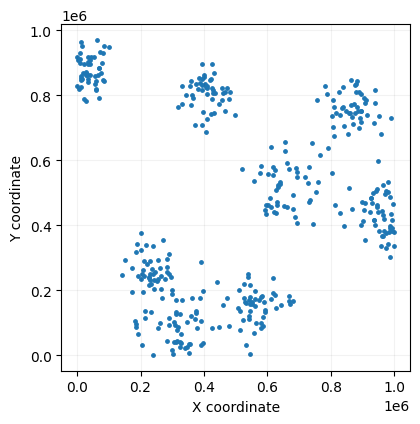

In [119]:
instance = test_instances[4]
fig, ax = plt.subplots(figsize=(4.5, 4.5))

df = instance._read_file_to_df()
plt.scatter(df["X"], df["Y"], s=6)
ax.ticklabel_format(style="scientific", axis="both", scilimits=(0, 0))
plt.grid(color="black", alpha=0.05)

plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.savefig("cluster_netgen.pdf", bbox_inches="tight", transparent=True)
plt.show()


In [ ]:
fig, ax = plt.subplots(figsize=(4.5, 4.5))

df = instance._read_file_to_df()
plt.scatter(df["X"], df["Y"], s=6)
ax.ticklabel_format(style="scientific", axis="both", scilimits=(0, 0))
plt.grid(color="black", alpha=0.05)

plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.savefig("grid.pdf", bbox_inches="tight", transparent=True)
plt.show()

In [ ]:
# import joblib
# paths = list((MAIN_DIR / "_archive" / "experiments" / "2025-01-27" / "200" / "database").glob("*.db"))
# for path in paths:
#     db = DB(path)

#     configured_portfolio_solvers = pd.read_sql_query(""" 
#     SELECT DISTINCT solver_id FROM results
#     WHERE prefix LIKE 'test%'                  
#     """, db._conn)["solver_id"].to_list()

#     portfolio = Portfolio.from_iterable([TSP_LKH_Solver.from_db(id_, db) for id_ in configured_portfolio_solvers])
#     joblib.dump(portfolio, MAIN_DIR / "portfolios" / "200" / f"{path.stem}.pkl")

# paths = list((MAIN_DIR / "_archive" / "experiments" / "2025-01-27" / "400" / "database").glob("*.db"))
# for path in paths:
#     db = DB(path)

#     configured_portfolio_solvers = pd.read_sql_query(""" 
#     SELECT DISTINCT solver_id FROM results
#     WHERE prefix LIKE 'test%'                  
#     """, db._conn)["solver_id"].to_list()

#     portfolio = Portfolio.from_iterable([TSP_LKH_Solver.from_db(id_, db) for id_ in configured_portfolio_solvers])
#     joblib.dump(portfolio, MAIN_DIR / "portfolios" / "400" / f"{path.stem}.pkl")

In [1]:
# import joblib

# paths = list((MAIN_DIR / "portfolios" / "200").glob("run-plain-30-*.pkl"))
# for path in paths:
#     run_id = path.stem.split("-")[-1]
#     portfolio = joblib.load(path)

#     for i in range(100):
#         portfolio.evaluate(
#             test_instances,
#             prefix=f"{run_id};test{i}",
#             calculate_features=False,
#             cache=False,
#         )